<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/JanechrisDataAnalyst/blob/main/CNN_Classwork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

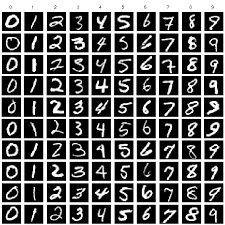

#Dataset:
MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms. MNIST is short for Modified National Institute of Standards and Technology database.

In [ ]:
mnist =tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()

#Preprocessing

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#check the shape of the target
y_train.shape

(60000,)

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

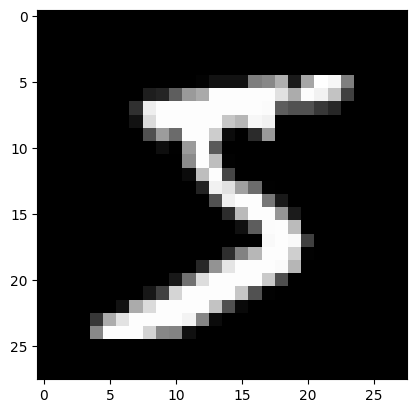

In [ ]:
#display image of first X_train(index 0)
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

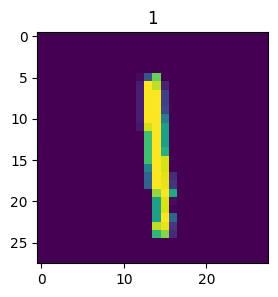

In [ ]:
# Display the image and the label:
class_labels = ["0", "1", "2", "3","4", "5", "6","7","8","9"]
index = 8
plt.figure(figsize= (3,3))
plt.imshow(X_train[index])
plt.title(class_labels[y_train[index]])
plt.show()

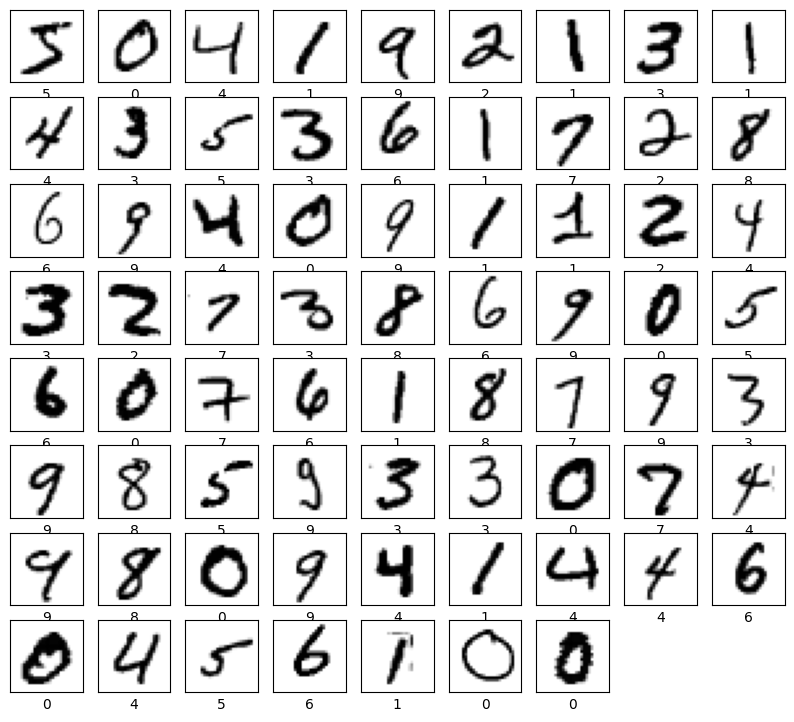

In [ ]:
import math
numbers_to_display = 70
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize = (10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap =plt.cm.binary)
    plt.xlabel(y_train [i])
plt.show()

In [ ]:
# Reshape the train data to include a channel dimension
X_train_reshaped = X_train.reshape(X_train.shape +(1,))

In [ ]:
#Normalise the train data to have values (0,1)
X_train_scaled = X_train_reshaped/255

In [ ]:
#Reshape the data to include a channel dimension
X_test_reshaped = X_test.reshape(X_test.shape + (1,))

In [ ]:
#Normalise the test data
X_test_scaled = X_test_reshaped/255

In [ ]:
# Normlizing:
X_train = X_train/255
X_test = X_test/255

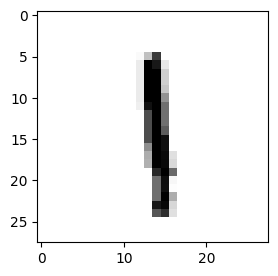

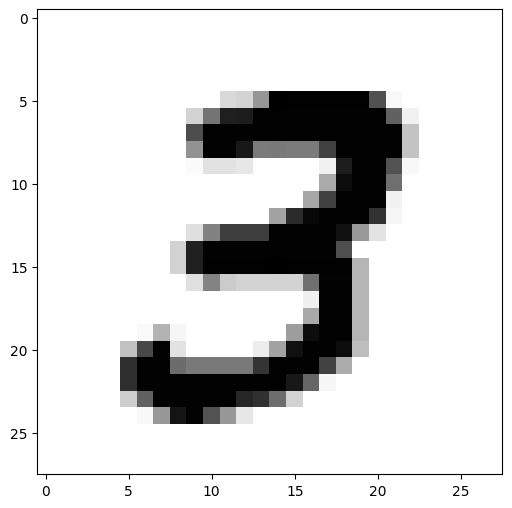

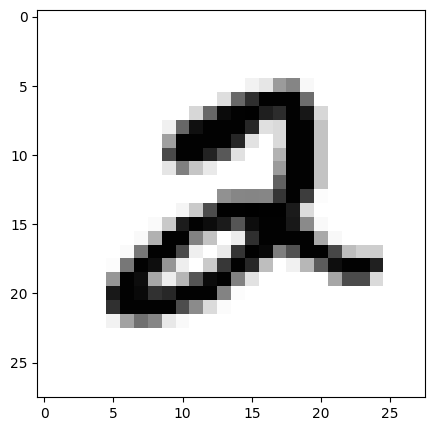

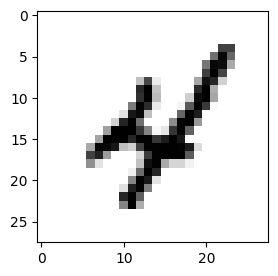

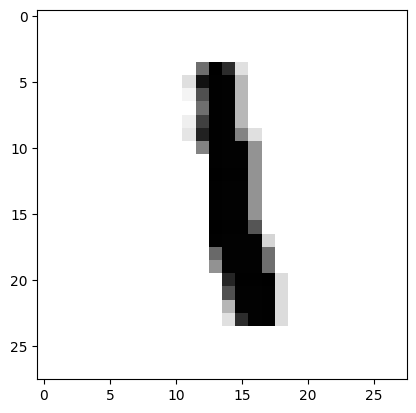

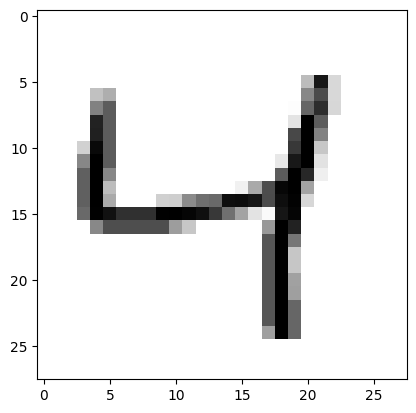

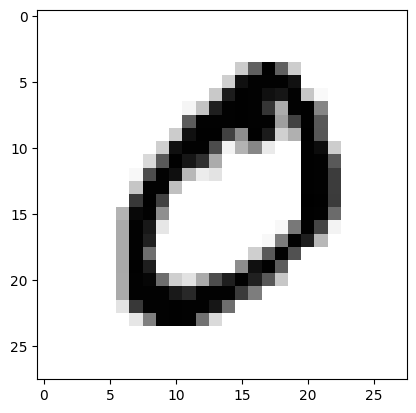

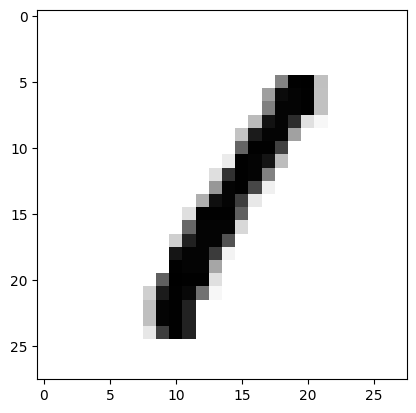

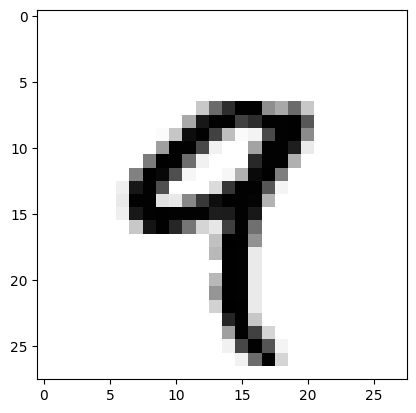

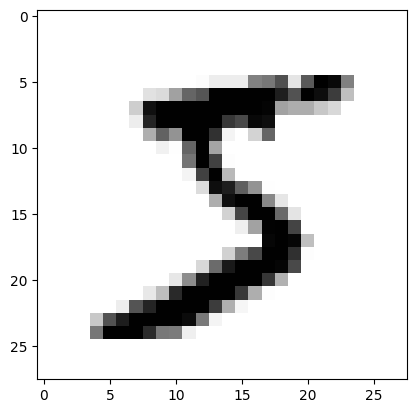

In [ ]:
#Visualizing the written number
plt.figure(figsize = (5,3))
plt.imshow(X_train[8], cmap = plt.cm.binary)
plt.show()

# for 7
plt.figure(figsize = (6,8))
plt.imshow(X_train[7], cmap = plt.cm.binary)
plt.show()

#for 5
plt.figure(figsize = (5,6))
plt.imshow(X_train[5], cmap = plt.cm.binary)
plt.show()


# for 9
plt.figure(figsize = (5,3))
plt.imshow(X_train[9], cmap = plt.cm.binary)
plt.show()
# for 6plt.figure(figsize = (5,3))
plt.imshow(X_train[6], cmap = plt.cm.binary)
plt.show()
# for 2plt.figure(figsize = (5,3))
plt.imshow(X_train[2], cmap = plt.cm.binary)
plt.show()
# for 1plt.figure(figsize = (5,3))
plt.imshow(X_train[1], cmap = plt.cm.binary)
plt.show()
# for 3plt.figure(figsize = (5,3))
plt.imshow(X_train[3], cmap = plt.cm.binary)
plt.show()
# for 4plt.figure(figsize = (5,3))
plt.imshow(X_train[4], cmap = plt.cm.binary)
plt.show()
#for 0plt.figure(figsize = (5,3))
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

# CNN IMPLEMENTATION

In [ ]:
# Convolution structure
#1. two convolutional layers
#2. one max pooling layer

#Classification
#1. flatten layer
#2. two dense layer
#3. one output layer

# initialise the model
model = Sequential()

# output layer
model.add(Input(shape = (28,28,1)))

# convolutional layers
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = (3,3), strides = 1, activation = 'relu'))

# maxpooling
model.add(MaxPooling2D(pool_size=(2,2), strides = 1))

# Flatten
model.add(Flatten())


# Hidden layer:
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))

# Output layer:
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.summary ()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8464)              0         
                                                                 
 dense (Dense)               (None, 16)                135440    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                      

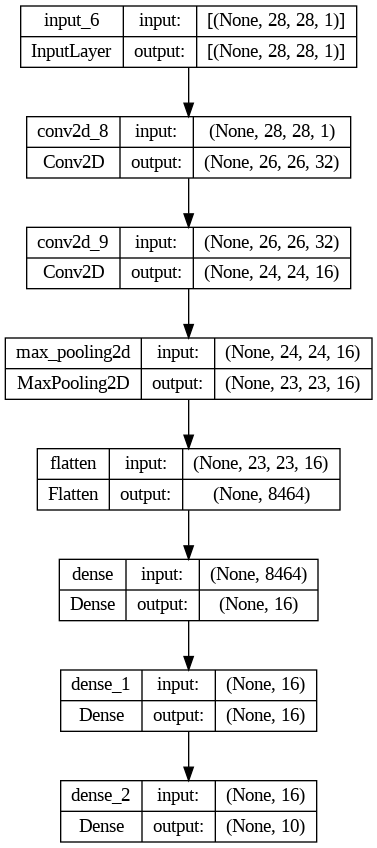

In [ ]:
# Visualization of our model summary that describe the various layers defined in the model:
tf.keras.utils.plot_model(
    model,
    show_shapes = True,
    show_layer_names = True,
)

In [ ]:
# Loss function for multi class classification target is integer

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.2,
         batch_size = 5000, epochs = 50, verbose = 1)

Epoch 1/50
10/10 [==============================] - 74s 7s/step - loss: 2.0611 - accuracy: 0.2839 - val_loss: 1.5754 - val_accuracy: 0.4902
Epoch 2/50
10/10 [==============================] - 68s 7s/step - loss: 1.2316 - accuracy: 0.5655 - val_loss: 0.8126 - val_accuracy: 0.7643
Epoch 3/50
10/10 [==============================] - 70s 7s/step - loss: 0.7196 - accuracy: 0.7891 - val_loss: 0.5404 - val_accuracy: 0.8441
Epoch 4/50
10/10 [==============================] - 69s 7s/step - loss: 0.5195 - accuracy: 0.8481 - val_loss: 0.4114 - val_accuracy: 0.8827
Epoch 5/50
10/10 [==============================] - 61s 6s/step - loss: 0.4096 - accuracy: 0.8823 - val_loss: 0.3388 - val_accuracy: 0.9058
Epoch 6/50
10/10 [==============================] - 66s 7s/step - loss: 0.3469 - accuracy: 0.9016 - val_loss: 0.2933 - val_accuracy: 0.9174
Epoch 7/50
10/10 [==============================] - 71s 7s/step - loss: 0.3002 - accuracy: 0.9156 - val_loss: 0.2560 - val_accuracy: 0.9272
Epoch 8/50
10/10 [==

# Model Prediction

In [ ]:
X_test_scaled[0:1].shape

(1, 28, 28, 1)

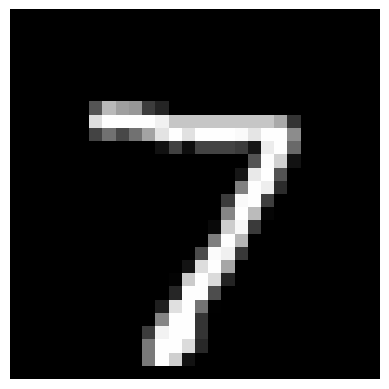

In [ ]:
# show the image at the first index of the data
plt.imshow(X_test_scaled[0,:,:,0], cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
# get the probability of the first sample in x_test_scaled
probability = model.predict(X_test_scaled[0:])

313/313 [==============================] - 3s 10ms/step


In [ ]:
np.max(probability) # return the highest

0.99999994

In [ ]:
# get the index corresponding to the class with the highest probability
np.argmax(probability)

546